In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
df = pd.read_csv(r'/kaggle/input/personal-key-indicators-of-heart-disease/2020/heart_2020_cleaned.csv')

In [3]:
df.head()
df.info()
print("df columns : ", len(df.columns))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319795 entries, 0 to 319794
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   HeartDisease      319795 non-null  object 
 1   BMI               319795 non-null  float64
 2   Smoking           319795 non-null  object 
 3   AlcoholDrinking   319795 non-null  object 
 4   Stroke            319795 non-null  object 
 5   PhysicalHealth    319795 non-null  float64
 6   MentalHealth      319795 non-null  float64
 7   DiffWalking       319795 non-null  object 
 8   Sex               319795 non-null  object 
 9   AgeCategory       319795 non-null  object 
 10  Race              319795 non-null  object 
 11  Diabetic          319795 non-null  object 
 12  PhysicalActivity  319795 non-null  object 
 13  GenHealth         319795 non-null  object 
 14  SleepTime         319795 non-null  float64
 15  Asthma            319795 non-null  object 
 16  KidneyDisease     31

In [4]:
# Remove unnecessary columns
columns_remove = ['SleepTime', 'Asthma', 'KidneyDisease', 'MentalHealth',
'SkinCancer', 'Race']

df_cleaned = df.drop(columns = columns_remove)
df_cleaned.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,DiffWalking,Sex,AgeCategory,Diabetic,PhysicalActivity,GenHealth
0,No,16.60,Yes,No,No,3.0,No,Female,55-59,Yes,Yes,Very good
1,No,20.34,No,No,Yes,0.0,No,Female,80 or older,No,Yes,Very good
2,No,26.58,Yes,No,No,20.0,No,Male,65-69,Yes,Yes,Fair
3,No,24.21,No,No,No,0.0,No,Female,75-79,No,No,Good
4,No,23.71,No,No,No,28.0,Yes,Female,40-44,No,Yes,Very good


In [5]:
df_cleaned.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319795 entries, 0 to 319794
Data columns (total 12 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   HeartDisease      319795 non-null  object 
 1   BMI               319795 non-null  float64
 2   Smoking           319795 non-null  object 
 3   AlcoholDrinking   319795 non-null  object 
 4   Stroke            319795 non-null  object 
 5   PhysicalHealth    319795 non-null  float64
 6   DiffWalking       319795 non-null  object 
 7   Sex               319795 non-null  object 
 8   AgeCategory       319795 non-null  object 
 9   Diabetic          319795 non-null  object 
 10  PhysicalActivity  319795 non-null  object 
 11  GenHealth         319795 non-null  object 
dtypes: float64(2), object(10)
memory usage: 29.3+ MB


In [6]:
print("Smoking : ", df_cleaned['Smoking'].unique())
print("AlcoholDrinking   : ", df_cleaned['AlcoholDrinking'].unique())
print("Stroke : ", df_cleaned['Stroke'].unique())
print("DiffWalking : ", df_cleaned['DiffWalking'].unique())
print("PhysicalActivity : ", df_cleaned['PhysicalActivity'].unique())
print("AgeCategory : ", df_cleaned['AgeCategory'].unique())
print("Diabetic : ", df_cleaned['Diabetic'].unique())

# we can use a loop to print all these

Smoking :  ['Yes' 'No']
AlcoholDrinking   :  ['No' 'Yes']
Stroke :  ['No' 'Yes']
DiffWalking :  ['No' 'Yes']
PhysicalActivity :  ['Yes' 'No']
AgeCategory :  ['55-59' '80 or older' '65-69' '75-79' '40-44' '70-74' '60-64' '50-54'
 '45-49' '18-24' '35-39' '30-34' '25-29']
Diabetic :  ['Yes' 'No' 'No, borderline diabetes' 'Yes (during pregnancy)']


In [7]:
for col in df_cleaned.columns:
    if df_cleaned[col].dtype == 'object':
        print("Column Name : " ,col, " value : ",df_cleaned[col].unique())

Column Name :  HeartDisease  value :  ['No' 'Yes']
Column Name :  Smoking  value :  ['Yes' 'No']
Column Name :  AlcoholDrinking  value :  ['No' 'Yes']
Column Name :  Stroke  value :  ['No' 'Yes']
Column Name :  DiffWalking  value :  ['No' 'Yes']
Column Name :  Sex  value :  ['Female' 'Male']
Column Name :  AgeCategory  value :  ['55-59' '80 or older' '65-69' '75-79' '40-44' '70-74' '60-64' '50-54'
 '45-49' '18-24' '35-39' '30-34' '25-29']
Column Name :  Diabetic  value :  ['Yes' 'No' 'No, borderline diabetes' 'Yes (during pregnancy)']
Column Name :  PhysicalActivity  value :  ['Yes' 'No']
Column Name :  GenHealth  value :  ['Very good' 'Fair' 'Good' 'Poor' 'Excellent']


In [8]:
# Now convert the object type to integer to float type
df_cleaned['HeartDisease'] = df_cleaned['HeartDisease'].map({'Yes': 1, 'No': 0})
print("HeartDisease : ", df_cleaned['HeartDisease'].unique())

HeartDisease :  [0 1]


In [9]:
# Repeat the same process which column is having object datatype.

df_cleaned['Smoking'] = df_cleaned['Smoking'].map({'Yes': 1, 'No': 0})
df_cleaned['AlcoholDrinking'] = df_cleaned['AlcoholDrinking'].map({'Yes': 1, 'No': 0})
df_cleaned['Stroke'] = df_cleaned['Stroke'].map({'Yes': 1, 'No': 0})
df_cleaned['Sex'] = df_cleaned['Sex'].map({'Male': 1, 'Female' : 0})

# Now yes or no are converted into categorical values (remember you can use loop for 
# mapping the values)

df_cleaned['DiffWalking'] = df_cleaned['DiffWalking'].map({'Yes': 1, 'No': 0})
df_cleaned['PhysicalActivity'] = df_cleaned['PhysicalActivity'].map({'Yes': 1, 'No': 0})

In [10]:
diabetic_mapping = {
    'Yes': 1, 
    'No': 0, 
    'No, borderline diabetes': 2, 
    'Yes (during pregnancy)': 3
}
df_cleaned['Diabetic'] = df_cleaned['Diabetic'].map(diabetic_mapping)
# Check the unique values after mapping
print("Diabetic after mapping: ", df_cleaned['Diabetic'].unique())

Diabetic after mapping:  [1 0 2 3]


In [11]:
genHealth_mapping = {
    'Excellent': 1, 
    'Very good': 2, 
    'Poor': 0, 
    'Fair': 4,
    'Good': 3
}
df_cleaned['GenHealth'] = df_cleaned['GenHealth'].map(genHealth_mapping)
# Check the unique values after mapping
print("GenHealth after mapping: ", df_cleaned['GenHealth'].unique())

GenHealth after mapping:  [2 4 3 0 1]


In [12]:
age_mapping = {
    '18-24': 1, '25-29': 2, '30-34': 3, '35-39': 4, '40-44': 5,
    '45-49': 6, '50-54': 7, '55-59': 8, '60-64': 9, '65-69': 10,
    '70-74': 11, '75-79': 12, '80 or older': 13
}
df_cleaned['AgeCategory'] = df_cleaned['AgeCategory'].map(age_mapping)
# Check the unique values after mapping
print("AgeCategory after mapping: ", df_cleaned['AgeCategory'].unique())

AgeCategory after mapping:  [ 8 13 10 12  5 11  9  7  6  1  4  3  2]


In [13]:
# All are converted into (int) or (float) type

print("Smoking : ", df_cleaned['Smoking'].unique())
print("AlcoholDrinking   : ", df_cleaned['AlcoholDrinking'].unique())
print("Stroke : ", df_cleaned['Stroke'].unique())
print("DiffWalking : ", df_cleaned['DiffWalking'].unique())
print("PhysicalActivity : ", df_cleaned['PhysicalActivity'].unique())
print("AgeCategory : ", df_cleaned['AgeCategory'].unique())
print("Diabetic : ", df_cleaned['Diabetic'].unique())

Smoking :  [1 0]
AlcoholDrinking   :  [0 1]
Stroke :  [0 1]
DiffWalking :  [0 1]
PhysicalActivity :  [1 0]
AgeCategory :  [ 8 13 10 12  5 11  9  7  6  1  4  3  2]
Diabetic :  [1 0 2 3]


In [14]:
df_cleaned.info()
print("HeartDisease : ", df_cleaned['HeartDisease'].unique())
print(df_cleaned.shape)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319795 entries, 0 to 319794
Data columns (total 12 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   HeartDisease      319795 non-null  int64  
 1   BMI               319795 non-null  float64
 2   Smoking           319795 non-null  int64  
 3   AlcoholDrinking   319795 non-null  int64  
 4   Stroke            319795 non-null  int64  
 5   PhysicalHealth    319795 non-null  float64
 6   DiffWalking       319795 non-null  int64  
 7   Sex               319795 non-null  int64  
 8   AgeCategory       319795 non-null  int64  
 9   Diabetic          319795 non-null  int64  
 10  PhysicalActivity  319795 non-null  int64  
 11  GenHealth         319795 non-null  int64  
dtypes: float64(2), int64(10)
memory usage: 29.3 MB
HeartDisease :  [0 1]
(319795, 12)


In [15]:
x = np.array(df_cleaned.drop(columns = ['HeartDisease']))
y = np.array(df_cleaned['HeartDisease'])

print(x.shape)
print("y shape : ", y.shape)

print("HeartDisease : ", df_cleaned['HeartDisease'].unique())

(319795, 11)
y shape :  (319795,)
HeartDisease :  [0 1]


In [16]:
#  Remove the outliers
# formula - > IQR = q3 - q1 , lower = q1 - 1.5 * IQR, upper = q3 + 1.5 * IQR

q1 = df_cleaned.quantile(0.25)
q3 = df_cleaned.quantile(0.75)

IQR = q3 - q1

lower = q1 - 1.5 * IQR
upper = q3 + 1.5 * IQR

df_perfect = df_cleaned[~((df_cleaned < lower) | (df_cleaned > upper)).any(axis=1)]

print("Size of data before removing outlier : ", df_cleaned.shape)
print("Size of data after removing outlier : ", df_perfect.shape)

Size of data before removing outlier :  (319795, 12)
Size of data after removing outlier :  (159205, 12)


In [17]:
# Normalization not needed as the values are already in 0s and 1s
def sigmoid(z):
    z = 1 / (1 + np.exp(-z))
    return z

In [18]:
def compute_cost(w, x, y, b):
    # formula = (-y(i)) log(f_x) - (1 - y(i)) log (1 - f_x)
    m = len(w)
    total_cost = 0
    for i in range(m):
        f_x = np.dot(w, x[i]) + b
        f_wb = sigmoid(f_x)
        total_cost += -(y[i] *  np.log(f_wb))- (1 - y[i]) * np.log(1 - f_wb)
    total_cost /= m

    return total_cost

In [19]:
def regularization(lamda, w, x , y, b):
    m = len(w)

    reg = 0
    cost_without_reg = compute_cost(w, x, y, b)
    for i in range(m):
        zwj = (w[i] ** 2)
        reg += zwj
    reg = lamda / (2 * m) *  reg

    total_cost = cost_without_reg + reg
    return total_cost

In [20]:
# formula = w - alpha (dw)
# b = b - alpha (db)

def compute_gradient(w, x ,y, b):
    m, n= x.shape
    dw_b = np.zeros((n))
    dj_b = 0
    for i in range(m):
        fw_z = np.dot(w,x[i]) + b
        fx_i = sigmoid(fw_z)
        for j in range(n):
            dw_b[j] += (fx_i - y[i]) * x[i,j]
        dj_b += (fx_i - y[i])

    dw_b = dw_b / m
    dj_b = dj_b / m

    return dw_b, dj_b

In [21]:
import math
def gradient_descent(alpha , w, x, y, b, iterations):

    J = []
    prev_cost = regularization(0.4, w,x, y, b)
    print("prev_cost", prev_cost)
    for i in range(iterations):
        dw, db = compute_gradient(w,x,y,b)
        w -= alpha * dw
        b -= alpha * db
        curr_cost = regularization(0.4, w,x, y, b)
        if i % 10 == 0 :
            print("curr : ", curr_cost)
            J.append(curr_cost)
            print(f"Iteration {i:2}: Cost {(J[-1]):8.4f}")
        prev_cost=curr_cost
    return w, b, J

initial_w = [0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5]
initial_b = 0.32
alpha = 0.3

w, b, cost = gradient_descent(alpha, initial_w, x, y, initial_b, 200)

print("w found by gradient descent:", w)
print("b found : ", b)

# the code block above takes a couple of minutes to run, 
# especially with a non-vectorized version. You can reduce the iterations to test your implementation and iterate faster. 

prev_cost nan


<ipython-input-18-e520bfaf9191>:8: RuntimeWarning: divide by zero encountered in log
  total_cost += -(y[i] *  np.log(f_wb))- (1 - y[i]) * np.log(1 - f_wb)
<ipython-input-18-e520bfaf9191>:8: RuntimeWarning: invalid value encountered in scalar multiply
  total_cost += -(y[i] *  np.log(f_wb))- (1 - y[i]) * np.log(1 - f_wb)


curr :  46.27521236956503
Iteration  0: Cost  46.2752
curr :  1.7081706330633644
Iteration 10: Cost   1.7082


<ipython-input-17-7d1691f43af7>:3: RuntimeWarning: overflow encountered in exp
  z = 1 / (1 + np.exp(-z))


curr :  15.231163290573486
Iteration 20: Cost  15.2312
curr :  18.583357840766578
Iteration 30: Cost  18.5834
curr :  13.96544531473067
Iteration 40: Cost  13.9654
curr :  3.825386534226965
Iteration 50: Cost   3.8254
curr :  8.412442186230718
Iteration 60: Cost   8.4124
curr :  2.8579816339966775
Iteration 70: Cost   2.8580
curr :  11.567153027942336
Iteration 80: Cost  11.5672
curr :  16.063079178892377
Iteration 90: Cost  16.0631
curr :  8.255163331990454
Iteration 100: Cost   8.2552
curr :  9.734191040069684
Iteration 110: Cost   9.7342
curr :  3.1865689750261312
Iteration 120: Cost   3.1866
curr :  3.4859629249871444
Iteration 130: Cost   3.4860
curr :  5.366025498713168
Iteration 140: Cost   5.3660
curr :  13.23524866949426
Iteration 150: Cost  13.2352
curr :  10.624691337727796
Iteration 160: Cost  10.6247
curr :  23.67012222899538
Iteration 170: Cost  23.6701
curr :  2.311411049737053
Iteration 180: Cost   2.3114
curr :  25.073583034853822
Iteration 190: Cost  25.0736
w found b

<function matplotlib.pyplot.show(close=None, block=None)>

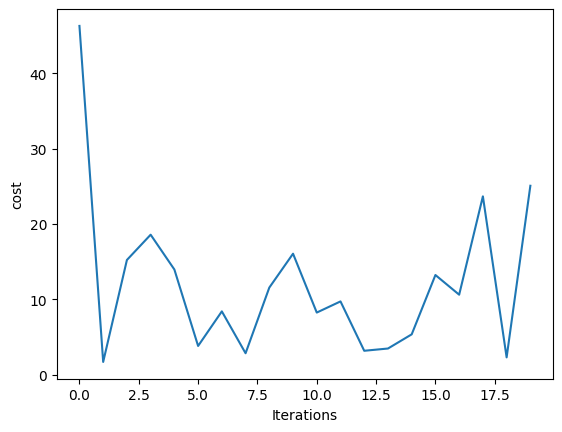

In [22]:
plt.plot(cost)
plt.xlabel('Iterations')
plt.ylabel('cost')
plt.show

In [23]:
feature_names = df_perfect.drop(columns=['HeartDisease']).columns
print(feature_names)

Index(['BMI', 'Smoking', 'AlcoholDrinking', 'Stroke', 'PhysicalHealth',
       'DiffWalking', 'Sex', 'AgeCategory', 'Diabetic', 'PhysicalActivity',
       'GenHealth'],
      dtype='object')


In [24]:
print(df_perfect.columns)
print(df_cleaned['HeartDisease'].unique())

Index(['HeartDisease', 'BMI', 'Smoking', 'AlcoholDrinking', 'Stroke',
       'PhysicalHealth', 'DiffWalking', 'Sex', 'AgeCategory', 'Diabetic',
       'PhysicalActivity', 'GenHealth'],
      dtype='object')
[0 1]


In [25]:
def predict(w, x, b):
    
    # Calculate the linear combination of inputs and weights
    m, n = x.shape   
    p = np.zeros(m)
    for i in range(m):
        z_wb = 0
        for j in range(n): 
            z_wb_ij = x[i, j] * w[j]
            z_wb += z_wb_ij
        
        z_wb += b
        f_wb = sigmoid(z_wb)
        p[i] = f_wb >= 0.5
        
    return p

In [26]:
def compute_accuracy(w, x, y, b):
    y_pred = predict(w, x, b)
    print(f'Output of predict: shape {y_pred.shape}, value {y_pred}')

    accuracy = np.mean(y_pred == y)  # Proportion of correct predictions
    return accuracy * 100  # Return percentage accuracy

print("w : ", w)
accuracy = compute_accuracy(w, x, y, b)
print(f"Training Accuracy: {accuracy:.2f}%")

w :  [-2.14565995  0.76646943  0.34590796  0.95444013 -0.03046546  1.04459583
  0.90858366  0.70776783  1.1334389  -0.31667397  0.31639012]
Output of predict: shape (319795,), value [0. 0. 0. ... 0. 0. 0.]
Training Accuracy: 91.44%


In [27]:
df_heart_disease = df_cleaned[df_cleaned['HeartDisease'] == 1]
df_heart_disease.head(3)

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,DiffWalking,Sex,AgeCategory,Diabetic,PhysicalActivity,GenHealth
5,1,28.87,1,0,0,6.0,1,0,12,0,0,4
10,1,34.30,1,0,0,30.0,1,1,9,1,0,0
35,1,32.98,1,0,1,10.0,1,1,12,1,1,0


In [28]:
new_data = np.array([28.87, 1, 0, 0, 6.0, 1, 0, 12, 0, 0, 4])
prediction = np.dot(w, new_data) + b

result = sigmoid(prediction)
print(result)

disease = 1 if result >=0.5 else 0
print(f"Prediction Probability: {result:.9f}")
print(disease)

8.768111109069904e-23
Prediction Probability: 0.000000000
0


In [29]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

x = np.array(df_cleaned.drop(columns = ['HeartDisease']))
y = np.array(df_cleaned['HeartDisease'])

# Scale the data
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)  # Scaling the feature matrix

# Create a logistic regression model
model = LogisticRegression(max_iter=100)  # Increase max_iter if needed

# Fit the model to the scaled data
model.fit(x_scaled, y)

y_pred = model.predict(x_scaled) 

# Predict on new data (make sure to scale new data as well)
new_data_scaled = scaler.transform([[20.34, 0, 0, 1, 0.0, 0, 0, 13, 0, 1, 2]])
prediction = model.predict(new_data_scaled)

print("Predicted class:", prediction)

accuracy = accuracy_score(y, y_pred)
print(f"Training Accuracy with scikit-learn: {accuracy * 100:.2f}%")


Predicted class: [0]
Training Accuracy with scikit-learn: 91.39%
